In [1]:
import psi4
import scipy
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
%%time
psi4.core.set_output_file('output.dat', False)

CPU times: user 269 µs, sys: 83 µs, total: 352 µs
Wall time: 1.15 ms


In [3]:
psi4.set_memory('500 MB')

500000000

In [4]:
#! Example potential energy surface scan and CP-correction for Ar

Ar_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    Ar2 = psi4.geometry(Ar_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=Ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.168852
            3.8                        -0.069952
            4.0                        -0.123122
            4.2                        -0.116537
            4.5                        -0.095162
            4.8                        -0.073663
            5.0                        -0.055927
            5.2                        -0.042277
            5.5                        -0.032054
            5.8                        -0.024469
            6.0                        -0.018843
            6.2                        -0.014650
            6.5                        -0.011500


In [5]:
Rvals = [3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5]
Energy = [0.168852, -0.069952, -0.123122, -0.116537, -0.095162, -0.073663, -0.055927, -0.042277, -0.032054, -0.024469, -0.018843, -0.014650, -0.011500]

In [6]:
def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

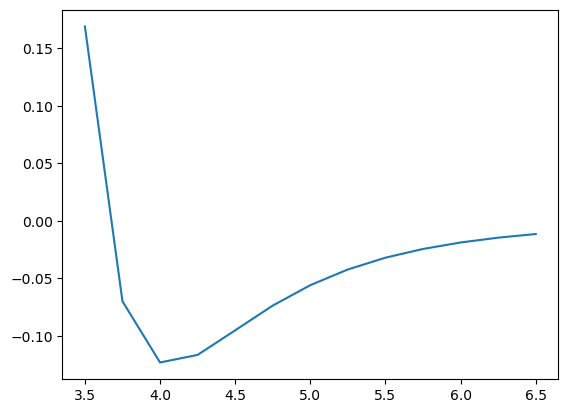

In [7]:
plt.figure()
plt.plot(Rvals, Energy)
plt.show()

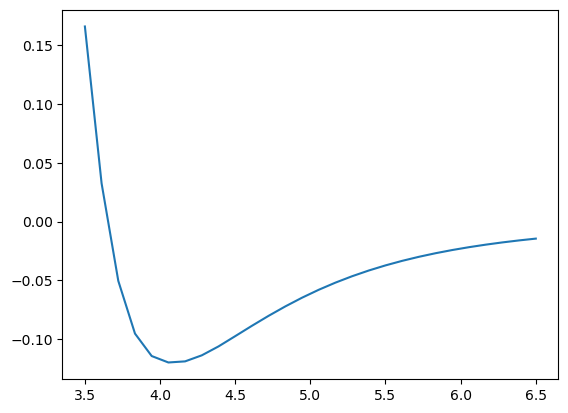

In [17]:
a, b = curve_fit(lj, Rvals, Energy)
# a are the parameters of the curve.

plt.figure()
Rvalsnew = np.linspace(3.5, 6.5, 28)
spl = make_interp_spline(Rvals, lj(Rvals, a[0], a[1]), k=3)
y_smooth = spl(Rvalsnew)

plt.plot(Rvalsnew, y_smooth)
plt.savefig('Ene_vs_dist.png')
plt.show()